# Casadi Simulation Example

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import copy
import casadi as ca

from pymola.backends.casadi_b.generator import generate
import pymola.backends.casadi_b.notebook as ca_nb

First we parse a simple circuit model and render it using the casadi SX symbol class. This will convert all matrix expression into a scalar expression. Both SX and MX are good at different problems, so it is nice to be able to choose which you want to use.m

In [2]:
with open('../models/SimpleCircuit.mo') as f:
    model_SX = generate(f.read(), 'SimpleCircuit', sym_class=ca.SX)
model_SX

------------------------------constants (   7)--------------------------------
input         0: 0x0
constant      1: AC.PI
parameter     6: [R1.R, C.C, R2.R, L.L, AC.VA, AC.f]
------------------------------variables (  32)--------------------------------
output        0: 0x0
state         2: [C.v, L.i]
alg_state    30: [R1.p.v, R1.p.i, R1.n.v, R1.n.i, R1.v, R1.i, C.p.v, C.p.i, C.n.v, C.n.i, C.i, R2.p.v, R2.p.i, R2.n.v, R2.n.i, R2.v, R2.i, L.p.v, L.p.i, L.n.v, L.n.i, L.v, AC.p.v, AC.p.i, AC.n.v, AC.n.i, AC.v, AC.i, G.p.v, G.p.i]
------------------------------equations (  32)--------------------------------
dae_eq        2: [(C.i-(C.C*der(C.v))), (L.v-(L.L*der(L.i)))]
alg_eq       30: [(R1.v-(R1.p.v-R1.n.v)), (-(R1.p.i+R1.n.i)), (R1.i-R1.p.i), (R1.v-(R1.i*R1.R)), (C.v-(C.p.v-C.n.v)), (-(C.p.i+C.n.i)), (C.i-C.p.i), (R2.v-(R2.p.v-R2.n.v)), (-(R2.p.i+R2.n.i)), (R2.i-R2.p.i), (R2.v-(R2.i*R2.R)), (L.v-(L.p.v-L.n.v)), (-(L.p.i+L.n.i)), (L.i-L.p.i), (AC.v-(AC.p.v-AC.n.v)), (-(AC.p.i+AC.n.i)), (

In [3]:
with open('../models/SimpleCircuit.mo') as f:
    model_MX = generate(f.read(), 'SimpleCircuit', sym_class=ca.MX)
model_MX

------------------------------constants (   7)--------------------------------
input         0: 0x0
constant      1: AC.PI
parameter     6: vertcat(R1.R, C.C, R2.R, L.L, AC.VA, AC.f)
------------------------------variables (  32)--------------------------------
output        0: 0x0
state         2: vertcat(C.v, L.i)
alg_state    30: vertcat(R1.p.v, R1.p.i, R1.n.v, R1.n.i, R1.v, R1.i, C.p.v, C.p.i, C.n.v, C.n.i, C.i, R2.p.v, R2.p.i, R2.n.v, R2.n.i, R2.v, R2.i, L.p.v, L.p.i, L.n.v, L.n.i, L.v, AC.p.v, AC.p.i, AC.n.v, AC.n.i, AC.v, AC.i, G.p.v, G.p.i)
------------------------------equations (  32)--------------------------------
dae_eq        2: vertcat((C.i-(C.C*der(C.v))), (L.v-(L.L*der(L.i))))
alg_eq       30: vertcat((R1.v-(R1.p.v-R1.n.v)), (-(R1.p.i+R1.n.i)), (R1.i-R1.p.i), (R1.v-(R1.i*R1.R)), (C.v-(C.p.v-C.n.v)), (-(C.p.i+C.n.i)), (C.i-C.p.i), (R2.v-(R2.p.v-R2.n.v)), (-(R2.p.i+R2.n.i)), (R2.i-R2.p.i), (R2.v-(R2.i*R2.R)), (L.v-(L.p.v-L.n.v)), (-(L.p.i+L.n.i)), (L.i-L.p.i), (AC.v-(AC.

## Convert to ODE

For this problem, you will see that working with SX is much cleaner, both are shown below.

In [4]:
model_ode = copy.deepcopy(model_SX)
model_ode.make_explicit()
model_ode

------------------------------constants (   6)--------------------------------
input         0: 0x0
constant      0: 0x0
parameter     6: [R1.R, C.C, R2.R, L.L, AC.VA, AC.f]
------------------------------variables (  32)--------------------------------
output       30: [R1.p.v, R1.p.i, R1.n.v, R1.n.i, R1.v, R1.i, C.p.v, C.p.i, C.n.v, C.n.i, C.i, R2.p.v, R2.p.i, R2.n.v, R2.n.i, R2.v, R2.i, L.p.v, L.p.i, L.n.v, L.n.i, L.v, AC.p.v, AC.p.i, AC.n.v, AC.n.i, AC.v, AC.i, G.p.v, G.p.i]
state         2: [C.v, L.i]
alg_state     0: 0x0
------------------------------equations (  32)--------------------------------
dae_eq        0: 0x0
alg_eq        0: 0x0
ode_rhs       2: @1=-1, @2=(AC.VA*sin(((6.28318*AC.f)*time))), [((((@1/R1.R)/C.C)*C.v)-(((@1/R1.R)*@2)/C.C)), ((@2/L.L)-((R2.R/L.L)*L.i))]
output_rhs   30: @1=(AC.VA*sin(((6.28318*AC.f)*time))), @2=-1, @3=(@2/R1.R), @4=(@2/R1.R), @5=0, [@1, (-((@3*@1)-(@4*C.v))), C.v, (-((@4*C.v)-(@3*@1))), (-(C.v-@1)), (-((@3*@1)-(@4*C.v))), C.v, (-((@3*@1)-(@4

In [5]:
model_ode_mx = copy.deepcopy(model_MX)
model_ode_mx.make_explicit()
model_ode_mx

------------------------------constants (   6)--------------------------------
input         0: 0x0
constant      0: 0x0
parameter     6: vertcat(R1.R, C.C, R2.R, L.L, AC.VA, AC.f)
------------------------------variables (  32)--------------------------------
output       30: vertcat(R1.p.v, R1.p.i, R1.n.v, R1.n.i, R1.v, R1.i, C.p.v, C.p.i, C.n.v, C.n.i, C.i, R2.p.v, R2.p.i, R2.n.v, R2.n.i, R2.v, R2.i, L.p.v, L.p.i, L.n.v, L.n.i, L.v, AC.p.v, AC.p.i, AC.n.v, AC.n.i, AC.v, AC.i, G.p.v, G.p.i)
state         2: vertcat(C.v, L.i)
alg_state     0: 0x0
------------------------------equations (  32)--------------------------------
dae_eq        0: 0x0
alg_eq        0: 0x0
ode_rhs       2: @1=vertsplit(ones(2x1)), @2=(zeros(2x2,2nz)[:2] = vertcat((-(C.C*@1{0})), (-(L.L*@1{1}))))', @3=vertsplit(ones(30x1)), @4=(zeros(30x2,2nz)[:2] = vertcat(@3{10}, @3{21}))', @5=vertsplit(ones(30x1,11nz)), @6=@5{0}, @7=@5{1}, @8=@5{6}, @9=@5{7}, @10=@5{13}, @11=@5{14}, @12=@5{16}, @13=@5{19}, @14=@5{20}, @15=@5

## Simulate

In [6]:
def plot_data(data):
    plt.figure()
    plt.plot(data['t'], data['x'])
    plt.grid()
    plt.xlabel('t')
    plt.title('state')

    plt.figure()
    plt.plot(data['t'], data['y'])
    plt.grid()
    plt.xlabel('t')
    plt.title('output')

Just-in-time compilation is used to speed up the simulation.

In [7]:
%%timeit
data = model_ode.sim_ode({'t0': 0, 'tf': 5, 'dt': 0.01, 'x0':[0, 0], 'p': [10, 0.01, 100, 0.1, 1, 1]})

930 ms ± 25.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


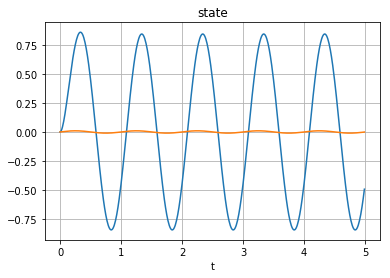

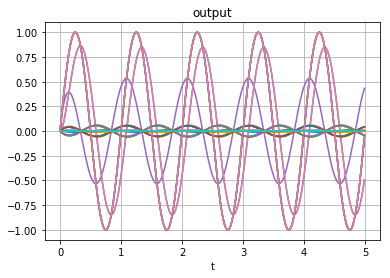

In [8]:
data = model_ode.sim_ode({'t0': 0, 'tf': 5, 'dt': 0.01, 'x0':[0, 0], 'p': [10, 0.01, 100, 0.1, 1, 1]})
plot_data(data)

# Model Inspection Tools

You can use view the equations using latex.

In [9]:
J = ca.jacobian(model_ode.ode_rhs, model_ode.state)
ca_nb.latex(J)

<IPython.core.display.Latex object>

You can also print latex for papers.

In [10]:
print(ca_nb.latex_print(J))

\begin{bmatrix}  ((-1/R1.R)/C.C) & 0 \\0 &  (-(R2.R/L.L)) \\ \end{bmatrix}\begin{align}\end{align}


You can also view expression graphs for the model.

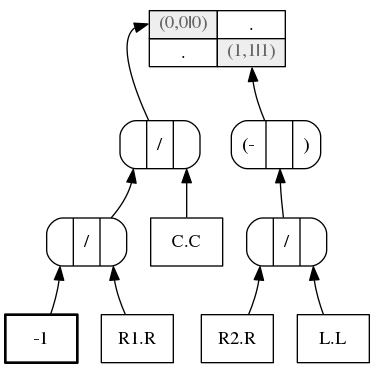

In [11]:
ca_nb.graph(ca.jacobian(model_ode.ode_rhs, model_ode.state))

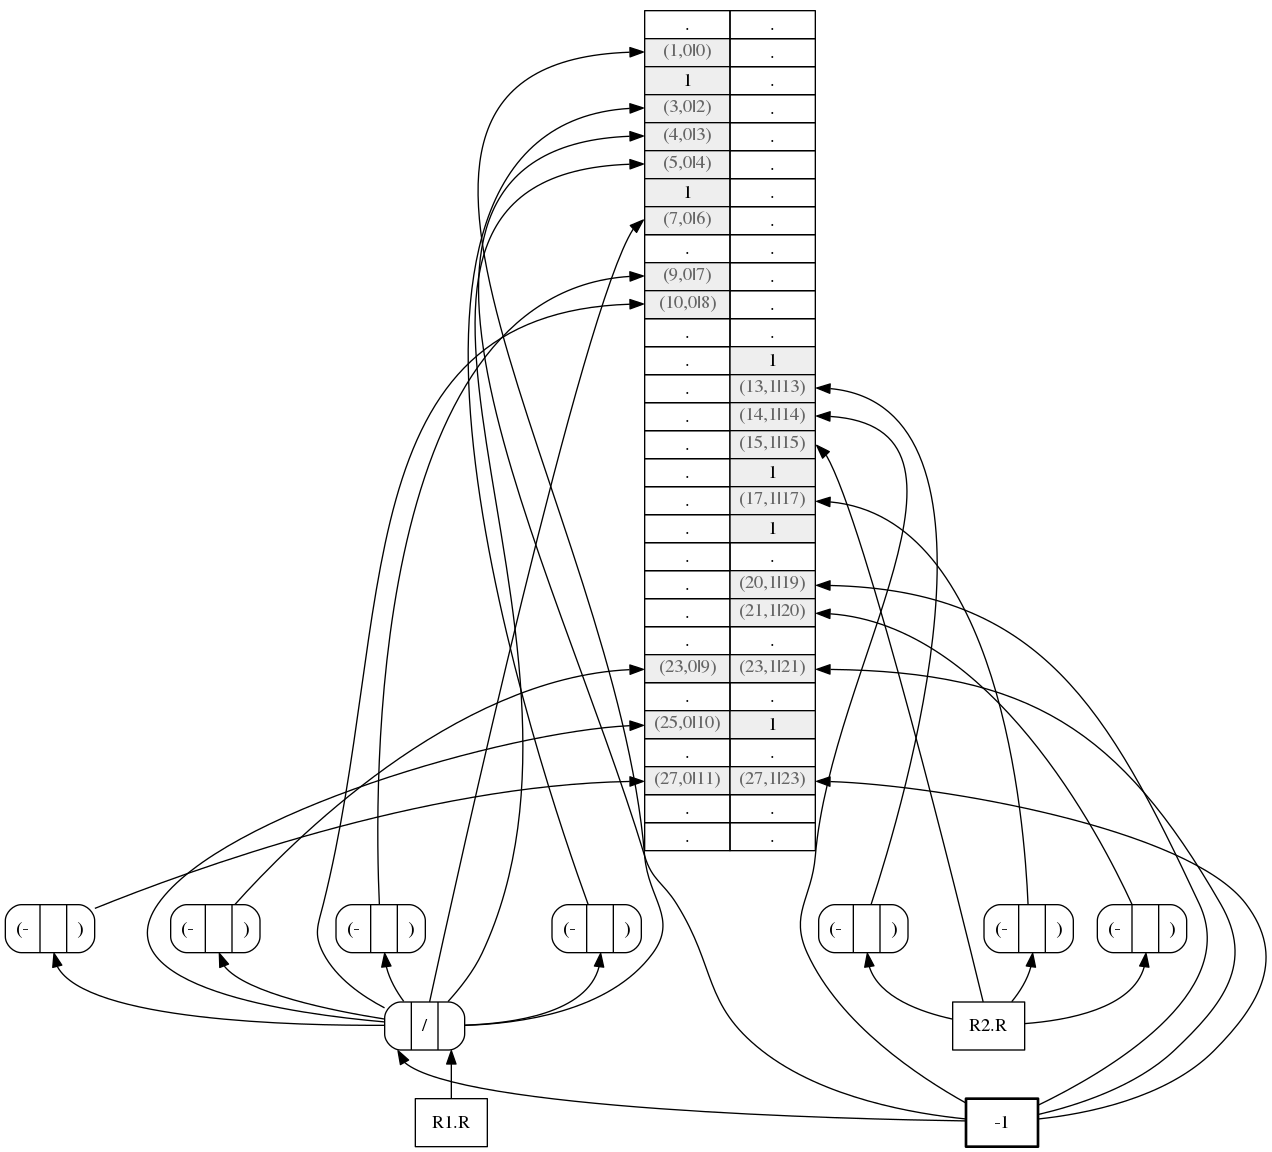

In [12]:
ca_nb.graph(ca.jacobian(model_ode.output_rhs, model_ode.state))